# Image Autoencoder

In this notebook we build the image autoencoder with a custom function that loads the images from the filw system and normalizes them

In [3]:
import pandas as pd
import numpy as np
import os 

from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.preprocessing import image
from keras.models import Model, load_model
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from custom_functions import norm_images

%matplotlib inline
pd.set_option('max_colwidth', -1)

In [4]:
path = os.path.join('../Data/')
path_models = os.path.join('../Models/')
path_images = path + 'Images/'

In [5]:
train_df = pd.read_csv(path + 'Images.csv', sep = ';')
train_df.head()

,id,image
0,1060651400131,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00160651400131____1__516x640.jpg
1,1060651400180,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/06/00160651400180____1__516x640.jpg
2,1051056400107,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00151056400115____1__516x640.jpg
3,1019350401147,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119350401147____3__516x640.jpg
4,1019353400229,http://sgfm.elcorteingles.es/SGFM/dctm/MEDIA03/201902/07/00119353400237____2__516x640.jpg


In [6]:
train_df.shape

(204812, 2)

In [7]:
train_df['id'].loc[40000:40003]

40000    001004560011738
40001    001004560011746
40002    001004560011753
40003    001004560011761
Name: id, dtype: object

## Autoencoder

In [37]:
input_img = Input(shape=(100,100,3))

#Encoder
x = Conv2D(50, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same', name='ENCODER')(x)

#Decoder

#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(50, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [38]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 50)      1400      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        14432     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 16)        4624      
_________________________________________________________________
ENCODER (MaxPooling2D)       (None, 13, 13, 16)        0         
__________

##  Train

In [7]:
X_data = norm_images.prepareImages(train_df, 100, path_images)        
X_data = norm_images.normalize(X_data)

In [20]:
BATCH_SIZE = 256
STEP_SIZE = train_df.shape[0]//BATCH_SIZE
GLOBAL_EPOCHS = 2
total = 0

print(f'Training model in {STEP_SIZE} steps..')

for epoch in range(0, GLOBAL_EPOCHS):
    
    total = 0
    print (f'==== EPOCH {epoch} ====')
    
    for STEP in range(0, STEP_SIZE):
        
        X_data = norm_images.prepareImages(train_df, total, path_images, BATCH_SIZE)
        X_data = norm_images.normalize(X_data)
        
        autoencoder.fit(X_data, X_data, epochs = 1, batch_size = BATCH_SIZE, 
                callbacks = None, verbose = 0, shuffle=False )
        
        total += BATCH_SIZE
        print(f'Step: {STEP/STEP_SIZE}, Total: {total}')

Training model in 800 steps..
==== EPOCH 0 ====
Step: 0.0, Total: 256
Step: 0.00125, Total: 512
Step: 0.0025, Total: 768
Step: 0.00375, Total: 1024
Step: 0.005, Total: 1280
Step: 0.00625, Total: 1536
Step: 0.0075, Total: 1792
Step: 0.00875, Total: 2048
Step: 0.01, Total: 2304
Step: 0.01125, Total: 2560
Step: 0.0125, Total: 2816
Step: 0.01375, Total: 3072
Step: 0.015, Total: 3328
Step: 0.01625, Total: 3584
Step: 0.0175, Total: 3840
Step: 0.01875, Total: 4096
Step: 0.02, Total: 4352
Step: 0.02125, Total: 4608
Step: 0.0225, Total: 4864
Step: 0.02375, Total: 5120
Step: 0.025, Total: 5376
Step: 0.02625, Total: 5632
Step: 0.0275, Total: 5888
Step: 0.02875, Total: 6144
Step: 0.03, Total: 6400
Step: 0.03125, Total: 6656
Step: 0.0325, Total: 6912
Step: 0.03375, Total: 7168
Step: 0.035, Total: 7424
Step: 0.03625, Total: 7680
Step: 0.0375, Total: 7936
Step: 0.03875, Total: 8192
Step: 0.04, Total: 8448
Step: 0.04125, Total: 8704
Step: 0.0425, Total: 8960
Step: 0.04375, Total: 9216
Step: 0.045, Tot

Step: 0.37875, Total: 77824
Step: 0.38, Total: 78080
Step: 0.38125, Total: 78336
Step: 0.3825, Total: 78592
Step: 0.38375, Total: 78848
Step: 0.385, Total: 79104
Step: 0.38625, Total: 79360
Step: 0.3875, Total: 79616
Step: 0.38875, Total: 79872
Step: 0.39, Total: 80128
Step: 0.39125, Total: 80384
Step: 0.3925, Total: 80640
Step: 0.39375, Total: 80896
Step: 0.395, Total: 81152
Step: 0.39625, Total: 81408
Step: 0.3975, Total: 81664
Step: 0.39875, Total: 81920
Step: 0.4, Total: 82176
Step: 0.40125, Total: 82432
Step: 0.4025, Total: 82688
Step: 0.40375, Total: 82944
Step: 0.405, Total: 83200
Step: 0.40625, Total: 83456
Step: 0.4075, Total: 83712
Step: 0.40875, Total: 83968
Step: 0.41, Total: 84224
Step: 0.41125, Total: 84480
Step: 0.4125, Total: 84736
Step: 0.41375, Total: 84992
Step: 0.415, Total: 85248
Step: 0.41625, Total: 85504
Step: 0.4175, Total: 85760
Step: 0.41875, Total: 86016
Step: 0.42, Total: 86272
Step: 0.42125, Total: 86528
Step: 0.4225, Total: 86784
Step: 0.42375, Total: 870

KeyboardInterrupt: 

### Autoencoder

In [8]:
#autoencoder.save('full_autoencoder.h5')
autoencoder = load_model(path_models + 'full_autoencoder.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### Encoder

In [9]:
encoder = Model(inputs=autoencoder.input, outputs = autoencoder.get_layer('ENCODER').output)

In [10]:
encoder.save(path_models + 'full_encoder.h5')

In [11]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 100, 100, 50)      1400      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 50, 50, 32)        14432     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 25, 25, 16)        4624      
_________________________________________________________________
ENCODER (MaxPooling2D)       (None, 13, 13, 16)        0         
Total para

## Visualize original image and reconstructed image

In [12]:
X_train = norm_images.prepareImages(train_df, 0, path_images, batch_size=1000)
X_train = norm_images.normalize(X_train)

In [13]:
X_train.shape

(1000, 100, 100, 3)

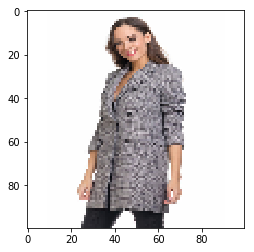

In [39]:
query = X_train[150]  #If you want to change the selection just change the index of X_train
plt.imshow(query)

### Encode the test images and the query image

In [40]:
X_test = X_train.copy()
X_test.shape

(1000, 100, 100, 3)

In [41]:
codes = encoder.predict(X_test)
codes.shape

(1000, 13, 13, 16)

In [42]:
query_code = encoder.predict(query.reshape(1,X_train.shape[1],X_train.shape[2],X_train.shape[3]))
query_code.shape

(1, 13, 13, 16)

### Find the closest images

In [43]:
codes = codes.reshape(-1, 13*13*16); 
print(codes.shape)
query_code = query_code.reshape(1, 13*13*16); 
print(query_code.shape)

(1000, 2704)
(1, 2704)


### Fit the KNN to the test set

In [44]:
n_neigh = 5

In [45]:
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes)

In [46]:
distances, indices = nbrs.kneighbors(np.array(query_code))

In [47]:
closest_images = X_test[indices]
closest_images = closest_images.reshape(-1,100,100,3); 
print(closest_images.shape)

(5, 100, 100, 3)


## Get the closest images


In [48]:
#m = np.mean(X_val)
#sd = np.std(X_val)

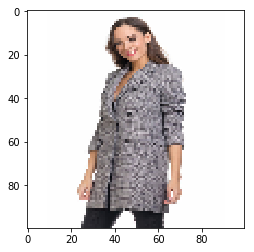

In [49]:
plt.imshow(query.reshape(100,100,3))

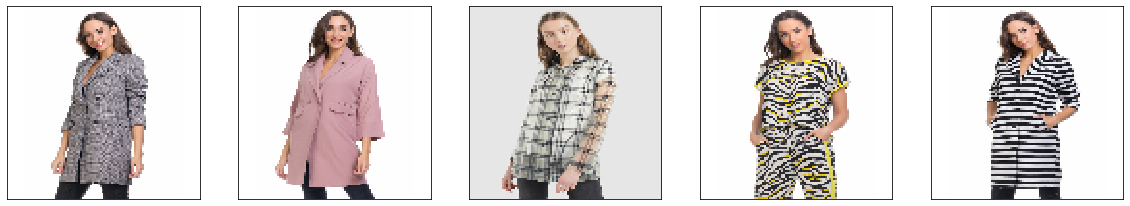

In [50]:
plt.figure(figsize=(20, 6))
for i in range(n_neigh):
    # display reconstruction
    ax = plt.subplot(1, n_neigh, i+1)
    plt.imshow(closest_images[i].reshape(100, 100,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

---